<a href="https://colab.research.google.com/github/arka19das/ML/blob/master/logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import scipy

import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv("ex2data1.txt",header=None,)

data.head()


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'input2')

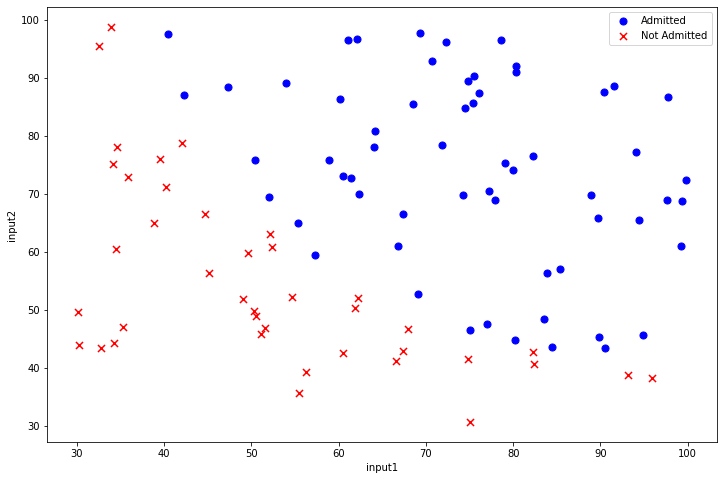

In [0]:
positive = data[data[2].isin([1])]
negative = data[data[2].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive[0], positive[1], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative[0], negative[1], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('input1')
ax.set_ylabel('input2')

In [0]:
def sigmoid(x):
    sig=1/(1+np.exp(-x))
    return sig



In [0]:
def cost(X,y,theta):
    (m,n)=X.shape
    ypred=sigmoid(np.matmul(X,theta))
    cost=-np.sum(y*np.log(ypred)+(1-y)*np.log(1-ypred))
    return cost/m



In [0]:
data=np.array(data)

In [0]:
X=data[:,:-1]

Y=data[:,-1]
(m,n)=X.shape
Y=Y.reshape(m,1)
one=np.ones((m,1))
X=np.append(X,one,axis=1)
n=n+1
Y

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [0]:
Xtrain=X[0:int(m*0.8)]
Ytrain=X[0:int(m*0.8)]
Xtest=X[int(m*0.8):m]
Ytest=Y[int(m*0.8):m]


In [0]:
#theta=np.random.randn(n,1)

#theta=theta.reshape((n,1))




In [0]:
#CHECKING COST FUNCTION AND THETA
theta=np.zeros((3,1))
theta=theta.reshape((n,1))

print(cost(X, Y, theta))

0.6931471805599453


In [0]:
def gradient_descent(X,Y,theta,itercount,alpha=0.001):
    temp=np.zeros(theta.shape)
    (m,n)=X.shape
    cost1=np.zeros(itercount)
    for i in range(itercount):
        error=sigmoid(np.matmul(X,theta))-Y
        t=(np.sum(X*error,axis=0)).reshape(n,1)
        
        temp=temp-alpha/m*t
        theta=temp
        cost1[i]=cost(X,Y,theta)    
    return temp,cost1


In [0]:
iter_count = 2000000
alpha = 0.001
g, cost1 = gradient_descent(X, Y, theta,iter_count,alpha)
print(g,cost1[1999990:2000000])

[[  0.15767916]
 [  0.15228738]
 [-19.08468795]] [0.21041331 0.2104133  0.21041329 0.21041329 0.21041328 0.21041327
 0.21041327 0.21041326 0.21041325 0.21041325]


In [0]:
print(cost(X,Y,g))

0.2104132459432896


Text(0.5, 1.0, 'Logistic Regression Prediction')

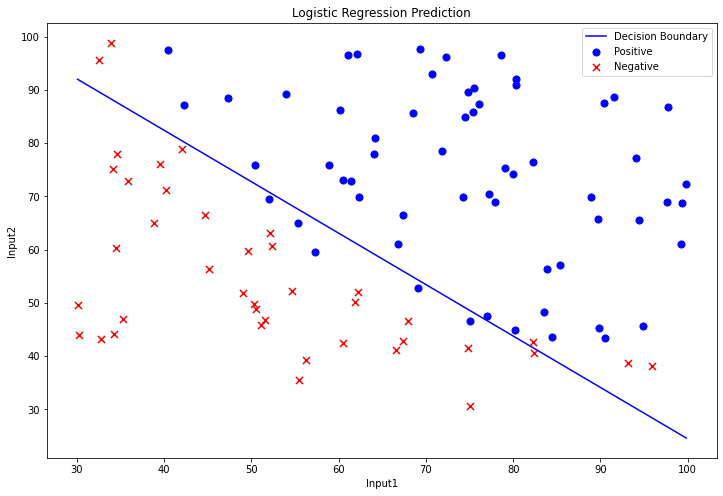

In [0]:
#copied from martha
data = pd.read_csv("ex2data1.txt", header = None, names = ["Input1", "Input2", "Output"])
data.head()
x1 = np.linspace(data.Input1.min(), data.Input1.max(),100)
x2 = np.linspace(data.Input2.min(), data.Input2.max(),100)
h = -(g[2] + (g[1] * x1))/(g[0])
positive = data[data['Output'].isin([1])]
negative = data[data['Output'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
# ax.scatter(data.Input1, data.Input2, label='Training Data')
ax.scatter(positive['Input1'], positive['Input2'], s=50, c='b', marker='o', label='Positive')
ax.scatter(negative['Input1'], negative['Input2'], s=50, c='r', marker='x', label='Negative')
# ax.plot(x1, x2, 'r', label='Prediction')
ax.plot(x1, h, 'b', label='Decision Boundary')

ax.legend(loc=1)
ax.set_xlabel("Input1")
ax.set_ylabel("Input2")
ax.set_title("Logistic Regression Prediction")

In [0]:
def predict(X,theta):
  return sigmoid(np.matmul(X,theta))
ypred=(predict(X,g))
for i in range(0,m):
  if(ypred[i]>0.5):
    ypred[i]=1
  if(ypred[i]<=0.5):
    ypred[i]=0
print(sum((ypred==Y)*1)/m)

[0.89]
